In [11]:
from subprocess import call
import os
os.system("export CTAPIPE_SVC_PATH=$CTAPIPE_SVC_PATH:$PWD")
os.system("echo $CTAPIPE_SVC_PATH")
# Change
os.environ["CTAPIPE_SVC_PATH"]="DIR_OF_THIS_SCRIPT"
call("ls")

0

/MAGIC (Table(11,)) 'Table of MAGIC images'
/MAGIC (Table(11,)) 'Table of MAGIC images'
  description := {
  "arrival_time": Float16Col(shape=(1039,), dflt=0.0, pos=0),
  "event_index": Int16Col(shape=(), dflt=0, pos=1),
  "event_time": Float32Col(shape=(), dflt=0.0, pos=2),
  "image_charge": Float16Col(shape=(1039,), dflt=0.0, pos=3),
  "pointing": Float16Col(shape=(2,), dflt=0.0, pos=4),
  "trigger_number": Int16Col(shape=(), dflt=0, pos=5)}
  byteorder := 'little'
  chunkshape := (31,)
DEBUG
(1039,)
[ 5.484  7.344  7.28   7.844  5.22   5.312  7.906 16.75  14.56  15.16
 13.47  14.47   8.47   6.562 12.41  36.75  27.56  19.31  10.19   5.67
 12.78  18.94  38.38  36.12  22.    15.59   8.06  20.44   8.84   8.125
  6.953 23.06  27.94  33.5   29.94  15.75  13.72   8.31   7.734  6.5
 14.97  28.06  30.62  15.75  17.25   8.41   6.67   7.516 11.56  20.44
 10.91  11.75  11.875  8.03   5.266  6.438 11.53   6.17  10.03  11.625
  7.25   5.33 ]
MomentParameters(size=877.859375, cen_x=<Quantity 0.092

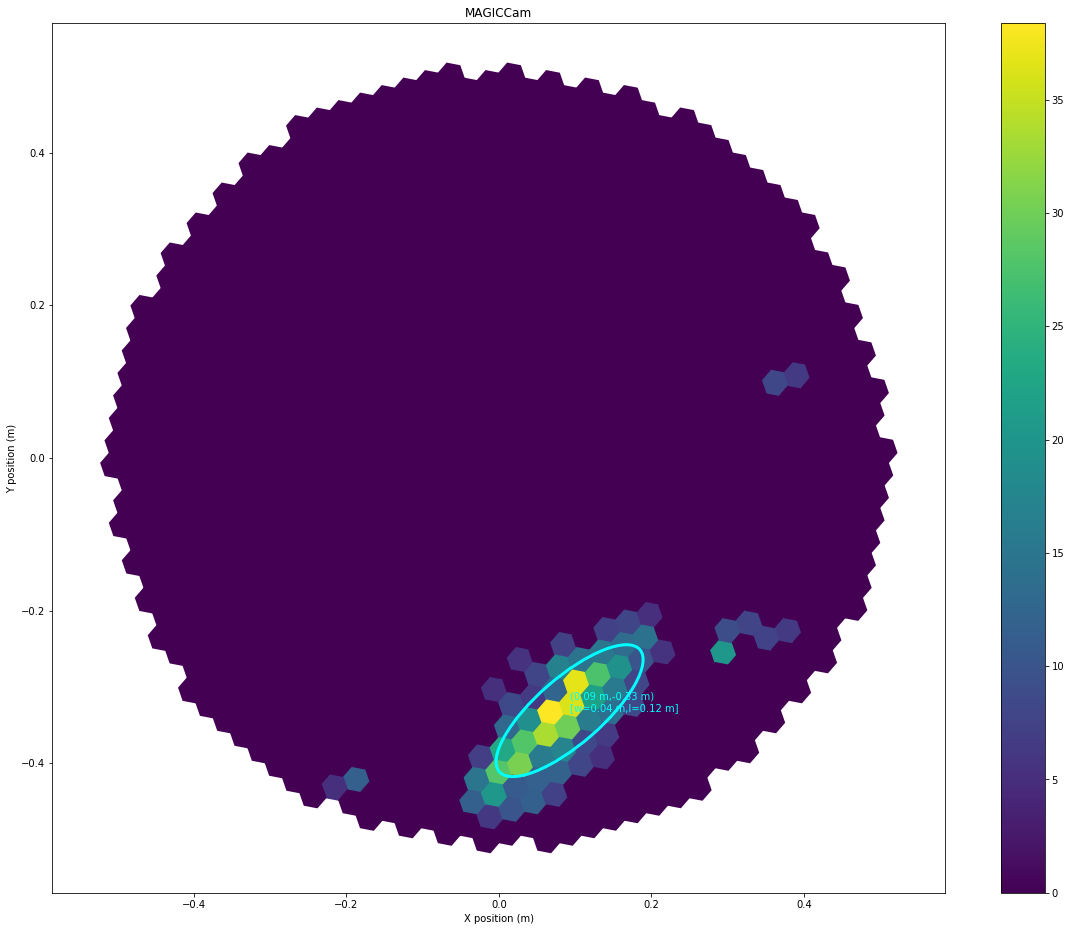

(11,)


In [10]:
import tables
import numpy as np
import matplotlib.pyplot as plt
import os
from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
from ctapipe.image.cleaning import tailcuts_clean
from ctapipe.image import hillas_parameters
import matplotlib as mpl
%matplotlib inline

#Reading data from the hdf5 file. Just to make this script work, 10 MAGIC events are  stored
#in this file. 
data = tables.open_file("M1_magic_data.h5")


t1 = data.root
print(t1.MAGIC)
row_str = t1.MAGIC
table = row_str

print(repr(table))

arrtime_image=[x['arrival_time'] for x in table.iterrows()]
charge_image=[x['image_charge'] for x in table.iterrows()]
event_mjd = [x['event_time'] for x in table.iterrows()]
pointings=[x['pointing'] for x in table.iterrows()]

#print(event_mjd)

from ctapipe.io.containers import DL1Container

dl1=DL1Container()

dl1.tel[0].image = charge_image[2] # this corrssponds to 3rd event in the file

image = dl1.tel[0].image
print("DEBUG")
#print(im)
print(image.shape)

cleaned_image = image


#MAGICCam geometry file is still not a part of ctapipe yet. Hence the file need to be stored 
# in the same directory where this script will be present. Here the name of the CameraGeometry file 
#is MAGICCam.fits.gz

camgeom = CameraGeometry.from_name("MAGICCam")
#camgeom = CameraGeometry.from_name("MAGIC")
mask = tailcuts_clean(camgeom,image,picture_thresh=7,boundary_thresh=5,keep_isolated_pixels=False)
cleaned_image[~mask] = 0
ind=np.where(cleaned_image !=0.0)
print(cleaned_image[ind])
#print(ind)

size = np.sum(cleaned_image)

try:
    hillas_params = hillas_parameters(camgeom,cleaned_image)
except:
    pass
#
plt.figure(figsize=(20,16))
disp = CameraDisplay(camgeom)
disp.image = cleaned_image
disp.add_colorbar()
disp.overlay_moments(hillas_params, color='cyan', linewidth=3)
print(hillas_params)
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams["figure.dpi"] = 120
#plt.figure(figsize=(20,20))
plt.savefig("An_evt_magic_cam_new.png",bbox_inches='tight')
plt.show()

print(np.shape(event_mjd))    